In [1]:
print('Ritu')

Ritu


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN

In [3]:
X, y = make_blobs(random_state = 23,centers = 3,n_samples = 2001,n_features = 2)

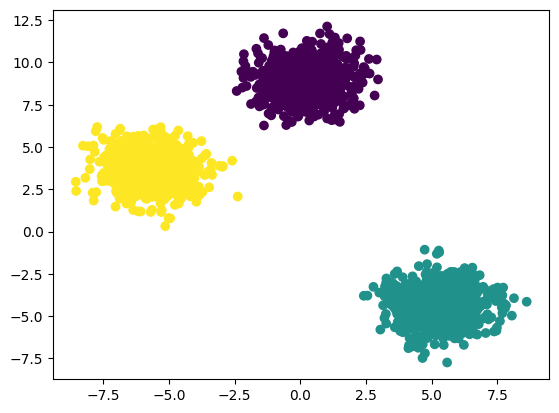

In [13]:
plt.scatter(X[:,0],X[:,1],c=y)

In [19]:
model = DBSCAN(eps = 0.8,min_samples = 4)
model.fit(X)

DBSCAN(eps=0.8, min_samples=4)

In [20]:
cls = model.labels_

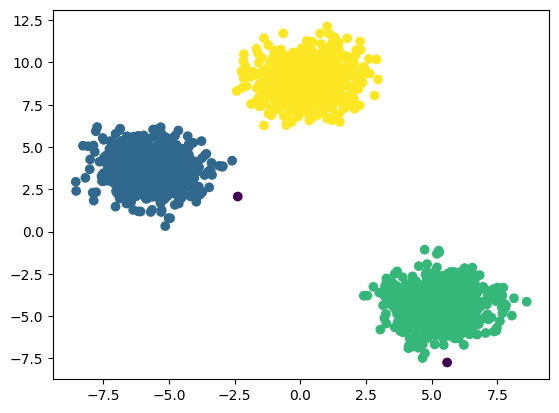

In [21]:
plt.scatter(X[:,0],X[:,1],c=cls)

In [23]:
from sklearn.metrics import silhouette_score
import time

In [39]:
all_params_score = {'eps':[],'min_samples':[],'silhouette_score':[]}
for i in np.round(np.linspace(.1,1,10),1):
    for j in range(4,7):
        model = DBSCAN(eps = i,min_samples = j)
        model.fit(X)
        cls = model.labels_
        score = round(silhouette_score(X,cls),4)

        all_params_score['eps'].append(i)
        all_params_score['min_samples'].append(j)
        all_params_score['silhouette_score'].append(score)

        plt.scatter(X[:,0],X[:,1],c=cls)
        plt.annotate(f'eps: {i}\nmin_samples: {j}\nsilhouette_score: {score}',xy=(5,10))
        plt.show()
        display(clear = True)
        time.sleep(1)
    
    
all_params_df = pd.DataFrame(all_params_score)
all_params_df

,eps,min_samples,silhouette_score
0,0.1,4,-0.3785
1,0.1,5,-0.5656
2,0.1,6,-0.6930
3,0.2,4,-0.2519
4,0.2,5,-0.2246
5,0.2,6,-0.2573
6,0.3,4,0.0117
7,0.3,5,0.3029
8,0.3,6,0.5063
9,0.4,4,0.4020


In [40]:
all_params_df[all_params_df['silhouette_score'] == all_params_df['silhouette_score'].max()]

,eps,min_samples,silhouette_score
22,0.8,5,0.7907
23,0.8,6,0.7907
